# Unicorn Companies Analysis

## Introduction

In this notebook, I will analyze data on unicorn companies—private startups valued at over $1 billion—to uncover trends in industry growth, geographic distribution, and investment patterns. The dataset includes over 1,000 unicorn companies, detailing their industry, country, year founded, and major investors. My goal is to explore key characteristics of these companies and provide actionable insights.

## Overview

To achieve this, I will perform various analyses, including:

- Cleaning and structuring the dataset, addressing missing values, and ensuring data integrity.  
- Aggregating company valuations by country and industry to identify major investment hubs.  
- Performing datetime transformations to analyze company growth over time.  
- Visualizing trends in unicorn emergence by industry and geography using bar charts, heatmaps, and maps.  
- Identifying the most common investors and their preferred industries.  
- Creating global valuation maps, with a focus on companies that became unicorns after 2020.  
- Filtering data to identify high-growth industries and key investment regions.  

By conducting these analyses, I aim to provide a data-driven perspective on the unicorn ecosystem, helping investors and analysts make informed decisions about future opportunities.


## Dataset Structure

### Unicorn Companies Dataset  
This dataset contains information about unicorn companies—privately held startups valued at over $1 billion. It includes key details about each company, such as its industry, geographic location, valuation, funding, and major investors. Below is a description of the key fields in this dataset:

- **Company**: The name of the unicorn company.  
- **Valuation**: The company's valuation in billions of dollars.  
- **Date Joined**: The date the company reached unicorn status.  
- **Industry**: The sector in which the company operates.  
- **City**: The city where the company is headquartered.  
- **Country/Region**: The country where the company is based.  
- **Continent**: The continent where the company operates.  
- **Year Founded**: The year the company was established.  
- **Funding**: The total funding received by the company.  
- **Select Investors**: The major investment firms backing the company.  

This dataset provides insights into industry trends, geographic distribution, and investment patterns among unicorn companies worldwide.


## Importing Required Libraries
Before beginning the analysis, it is essential to import all necessary libraries. 

In [28]:
import numpy as np
import pandas as pd
import seaborn as sns
import datetime as dt
import matplotlib.pyplot as plt

# Exploring the Dataset: Structure, Trends, and Key Insights

## Introduction
In this section, I will use Python libraries like pandas, numpy, seaborn, and matplotlib.pyplot to analyze a dataset of unicorn companies. My objective is to help an investment firm decide which industries and companies to focus on by identifying significant trends in how and when companies reach unicorn status. This dataset includes information on over 1,000 unicorn companies, including their valuation and key investors.

This analysis involves exploratory data analysis (EDA), a critical step in understanding patterns and structuring data for deeper insights. By visualizing and interpreting trends, I aim to provide actionable recommendations for the firm's investment strategy.

In [29]:
companies = pd.read_csv(r"C:\Users\saswa\Documents\GitHub\Unicorn-Companies-Analysis\Data\Unicorn companies.csv")

### Exploring the Dataset
#### Displaying the First 10 Rows
The first 10 rows provide an initial understanding of the dataset's structure.

In [30]:
companies.head(10)

,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors
0,Bytedance,$180B,4/7/17,Artificial intelligence,Beijing,China,Asia,2012,$8B,"Sequoia Capital China, SIG Asia Investments, S..."
1,SpaceX,$100B,12/1/12,Other,Hawthorne,United States,North America,2002,$7B,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,SHEIN,$100B,7/3/18,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,$2B,"Tiger Global Management, Sequoia Capital China..."
3,Stripe,$95B,1/23/14,Fintech,San Francisco,United States,North America,2010,$2B,"Khosla Ventures, LowercaseCapital, capitalG"
4,Klarna,$46B,12/12/11,Fintech,Stockholm,Sweden,Europe,2005,$4B,"Institutional Venture Partners, Sequoia Capita..."
5,Canva,$40B,1/8/18,Internet software & services,Surry Hills,Australia,Oceania,2012,$572M,"Sequoia Capital China, Blackbird Ventures, Mat..."
6,Checkout.com,$40B,5/2/19,Fintech,London,United Kingdom,Europe,2012,$2B,"Tiger Global Management, Insight Partners, DST..."
7,Instacart,$39B,12/30/14,"Supply chain, logistics, & delivery",San Francisco,United States,North America,2012,$3B,"Khosla Ventures, Kleiner Perkins Caufield & By..."
8,JUUL Labs,$38B,12/20/17,Consumer & retail,San Francisco,United States,North America,2015,$14B,Tiger Global Management
9,Databricks,$38B,2/5/19,Data management & analytics,San Francisco,United States,North America,2013,$3B,"Andreessen Horowitz, New Enterprise Associates..."


Understanding Columns

The "Date Joined" column represents the date when a company achieved unicorn status.

The "Select Investors" column represents key investors who have invested in these companies.

#### Assessing Dataset Size

The size property reveals the total number of values in the dataset.

In [31]:
companies.size

10740

The dataset contains 10,740 values across all columns.

#### Determining Dataset Shape

Using the `.shape` property, I identified the number of rows and columns.

In [32]:
companies.shape

(1074, 10)

The dataset consists of 1,074 rows (unicorn companies) and 10 columns (company attributes).

#### Checking Data Types

I used .info() to examine the data types of each column.

In [33]:
companies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1074 entries, 0 to 1073
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Company           1074 non-null   object
 1   Valuation         1074 non-null   object
 2   Date Joined       1074 non-null   object
 3   Industry          1074 non-null   object
 4   City              1058 non-null   object
 5   Country/Region    1074 non-null   object
 6   Continent         1074 non-null   object
 7   Year Founded      1074 non-null   int64 
 8   Funding           1074 non-null   object
 9   Select Investors  1073 non-null   object
dtypes: int64(1), object(9)
memory usage: 84.0+ KB


**Observations:**

The "Year Founded" column is stored as int64, allowing for numerical calculations and trend analysis.

The "Date Joined" column is stored as an object, indicating that it needs conversion to datetime format for better analysis.

### Statistical Analysis

To generate descriptive statistics for numerical columns, I used .describe().

In [34]:
companies.describe()

,Year Founded
count,1074.000000
mean,2012.895717
std,5.698573
min,1919.000000
25%,2011.000000
50%,2014.000000
75%,2016.000000
max,2021.000000


Key Findings:

The earliest founded company in the dataset dates back to 1919.

The most recent founded company in the dataset is from 2021.

### Data Cleaning and Transformation

#### Converting "Date Joined" to Datetime Format

Since the "Date Joined" column is stored as a string, I converted it to datetime format for better analysis.

In [35]:
companies['Date Joined'] = pd.to_datetime(companies['Date Joined'], format="%Y-%m-%d", errors='coerce')

companies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1074 entries, 0 to 1073
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Company           1074 non-null   object        
 1   Valuation         1074 non-null   object        
 2   Date Joined       0 non-null      datetime64[ns]
 3   Industry          1074 non-null   object        
 4   City              1058 non-null   object        
 5   Country/Region    1074 non-null   object        
 6   Continent         1074 non-null   object        
 7   Year Founded      1074 non-null   int64         
 8   Funding           1074 non-null   object        
 9   Select Investors  1073 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(8)
memory usage: 84.0+ KB


#### Extracting "Year Joined"

For better comparison, I extracted the year component from "Date Joined" and stored it in a new column called "Year Joined".

In [36]:
companies['Year Joined'] = companies['Date Joined'].dt.year

companies.head()

,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors,Year Joined
0,Bytedance,$180B,NaT,Artificial intelligence,Beijing,China,Asia,2012,$8B,"Sequoia Capital China, SIG Asia Investments, S...",NaN
1,SpaceX,$100B,NaT,Other,Hawthorne,United States,North America,2002,$7B,"Founders Fund, Draper Fisher Jurvetson, Rothen...",NaN
2,SHEIN,$100B,NaT,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,$2B,"Tiger Global Management, Sequoia Capital China...",NaN
3,Stripe,$95B,NaT,Fintech,San Francisco,United States,North America,2010,$2B,"Khosla Ventures, LowercaseCapital, capitalG",NaN
4,Klarna,$46B,NaT,Fintech,Stockholm,Sweden,Europe,2005,$4B,"Institutional Venture Partners, Sequoia Capita...",NaN


### Results and Evaluation

### Take a Sample of the Data

It is not necessary to take a sample of the data in order to conduct the visualizations and EDA that follow. However, in certain scenarios, sampling is useful due to time and resource limitations. To develop skills in sampling, a sample of the data was taken for the next steps of analysis using the sample() function.

In [37]:
companies_sampled = companies.sample(n=50, random_state=42)

### Visualize the Time It Took Companies to Reach Unicorn Status

A bar plot was created to visualize the longest time it took companies to reach unicorn status for each industry represented in the sample. The data was prepared by calculating the difference between the Year Joined and Year Founded columns.

In [38]:
companies_sampled["years_until_unicorn"] = companies_sampled["Year Joined"] - companies_sampled["Year Founded"]

grouped = companies_sampled[["Industry", "years_until_unicorn"]].groupby("Industry").max().sort_values("years_until_unicorn")



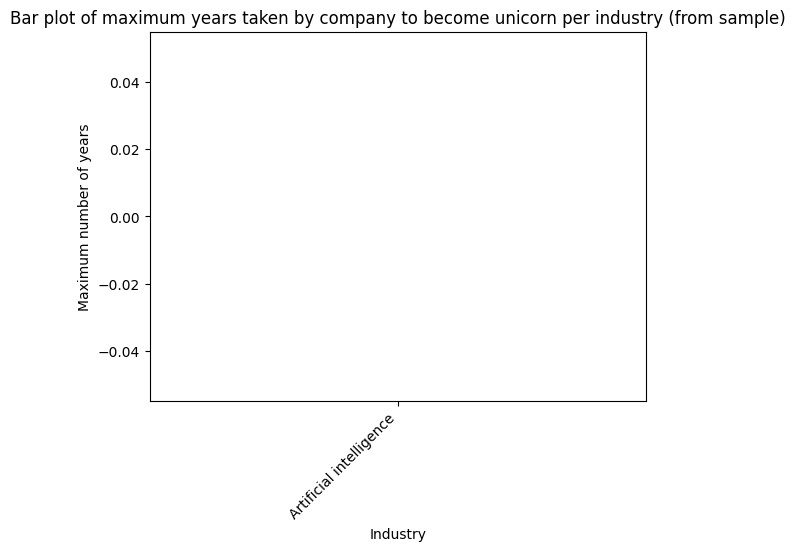

In [39]:
plt.bar(x=grouped.index, height=grouped["years_until_unicorn"], label="Years taken to reach unicorn")

plt.title("Bar plot of maximum years taken by company to become unicorn per industry (from sample)")
plt.xlabel("Industry")
plt.ylabel("Maximum number of years")
plt.xticks(rotation=45, horizontalalignment='right')

plt.show()

**Observations:**

The industries that took the longest to reach unicorn status are Fintech and Health, both taking 21 years.

Cybersecurity took 19 years, while E-commerce & Direct-to-Consumer took 18 years.

The fastest industry to reach unicorn status was Consumer & Retail.

#### Visualize the Maximum Unicorn Company Valuation per Industry

A bar plot was created to visualize unicorn companies' maximum valuation per industry in the sample. First, a new column was created to represent the valuation as a numerical value.

In [40]:
companies_sampled['valuation_billions'] = companies_sampled['Valuation'].str.replace("$", "").str.replace("B", "").astype('int')

companies_sampled.head()

,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors,Year Joined,years_until_unicorn,valuation_billions
542,Aiven,$2B,NaT,Internet software & services,Helsinki,Finland,Europe,2016,$210M,"Institutional Venture Partners, Atomico, Early...",NaN,NaN,2
370,Jusfoun Big Data,$2B,NaT,Data management & analytics,Beijing,China,Asia,2010,$137M,"Boxin Capital, DT Capital Partners, IDG Capital",NaN,NaN,2
307,Innovaccer,$3B,NaT,Health,San Francisco,United States,North America,2014,$379M,"M12, WestBridge Capital, Lightspeed Venture Pa...",NaN,NaN,3
493,Algolia,$2B,NaT,Internet software & services,San Francisco,United States,North America,2012,$334M,"Accel, Alven Capital, Storm Ventures",NaN,NaN,2
350,SouChe Holdings,$3B,NaT,E-commerce & direct-to-consumer,Hangzhou,China,Asia,2012,$1B,"Morningside Ventures, Warburg Pincus, CreditEa...",NaN,NaN,3


In [41]:
grouped1 = companies_sampled[["Industry", "valuation_billions"]].groupby("Industry").sum().sort_values(by="valuation_billions")

plt.show()

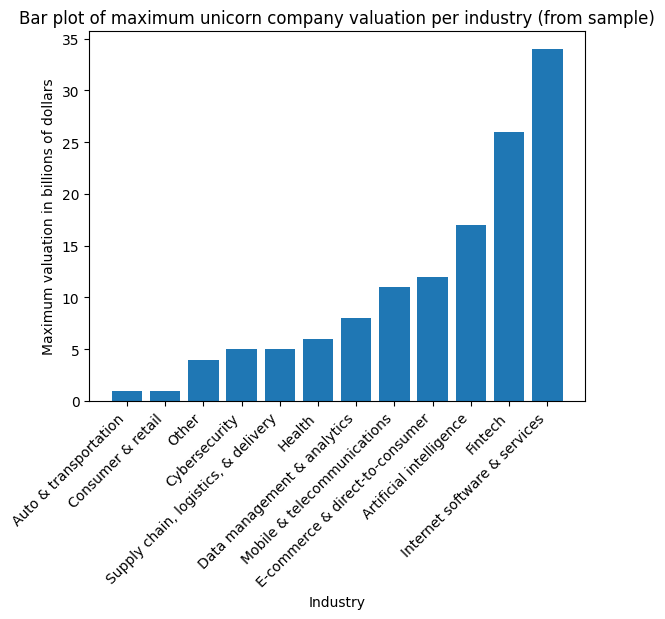

In [42]:
plt.bar(x=grouped1.index, height=grouped1['valuation_billions'], label="Valuation in billions")

plt.title("Bar plot of maximum unicorn company valuation per industry (from sample)")
plt.xlabel("Industry")
plt.ylabel("Maximum valuation in billions of dollars")
plt.xticks(rotation=45, horizontalalignment='right')

plt.show()

**Observations:**

The highest valuation is in the Internet Software & Services industry, valued at 34 billion dollars.

Fintech follows at 26 billion dollars, with Artificial Intelligence at 17 billion dollars.

The industries with the lowest valuations are Auto & Transportation and Consumer & Retail, both at 1 billion dollars.

Key Takeaways

- Visualizations and data grouping help in understanding dataset structures and industry trends.
- Pandas functions like `info()`, `shape()`, `sample()`, and `describe()` assist in inspecting and summarizing data.
- `matplotlib.pyplot` bar plots effectively compare industry trends.
- The dataset consists of 1,074 unicorn companies.
- Fintech and Health industries took longer to reach unicorn status but have high valuations.
- The Internet Software & Services industry has the highest unicorn valuation at 34 billion dollars.